## Main Task
Using historical sales data from 2010 to 2018, forecast the daily (or weekly) sales volume (Number Sold) for each store-product combination in 2019.  
This forecast will help understand demand patterns and predict future inventory needs.

### Data Understanding
This dataset contains simulated time series data covering 10 years (2010-2019). The features include date, store id, product id and number sold.  
The train.csv covers the years 2010-2018 and the test.csv covers 2019 only. The are 7 unique stores and 10 unique products.  

### Exploratory Data Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("Datasets/train2010_2018.csv")

In [3]:
dataset.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [5]:
dataset.describe()

,store,product,number_sold
count,230090.000000,230090.000000,230090.000000
mean,3.000000,4.500000,780.926107
std,2.000004,2.872288,204.096737
min,0.000000,0.000000,238.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,835.000000
75%,5.000000,7.000000,914.000000
max,6.000000,9.000000,1205.000000


In [6]:
# Checking Missing Values
dataset.isnull().sum()

Date           0
store          0
product        0
number_sold    0
dtype: int64

In [7]:
# Converting the String format of Date to datetime object, which enables time-based functionality like resampling.

dataset['Date'] = pd.to_datetime(dataset['Date'])

**Identifying Unique Time Series Patterns**  

Since we have multiple Store_IDs and Product_IDs, it’s essential to understand how each combination behaves over time.  
By visualizing these unique combinations, we can identify patterns like seasonality, trends, or irregularities in sales, which will influence our choice of forecasting models and preprocessing methods.

In [ ]:
unique_combinations = dataset.groupby(['store', 'product']).size()
# 7 Unique Stores, 10 Unique Products => 7 * 10 = 70 Unique Combinations.
print(f"Number of unique store-product combinations: {len(unique_combinations)}. Each Combination represents a unique time series.")

Number of unique store-product combinations: 70. Each Combination represents a unique time series.


**Efficiently Identifying Trends, Seasonality, and Volatility**  

1. **Sample-Based Visualization**
By selecting a few representative store-product combinations, we can get an initial sense of general patterns in the data.  
If a combination shows seasonality or a trend, there’s a good chance others might exhibit similar behavior.  

Choose a few combinations that represent different stores and products. For example, you might select one product from each store to visualize a diverse set of patterns.

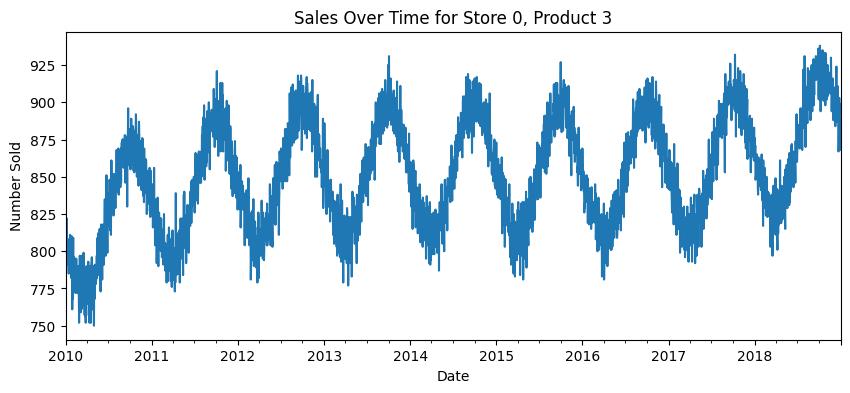

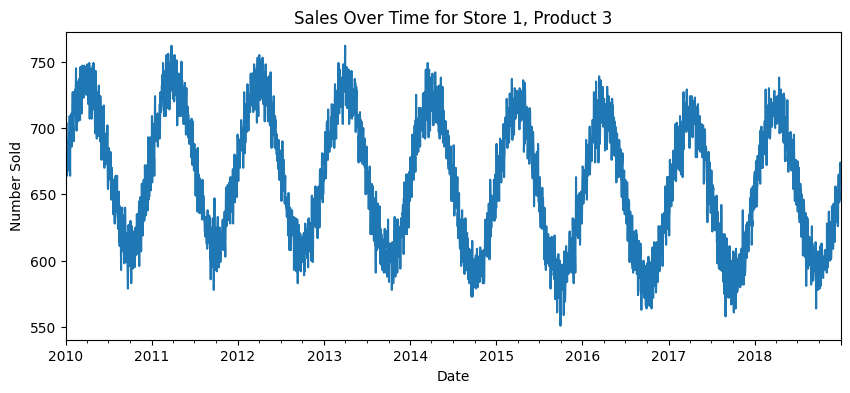

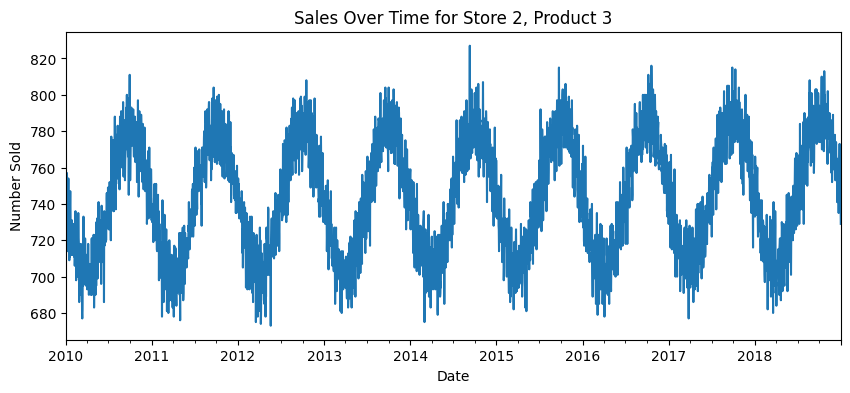

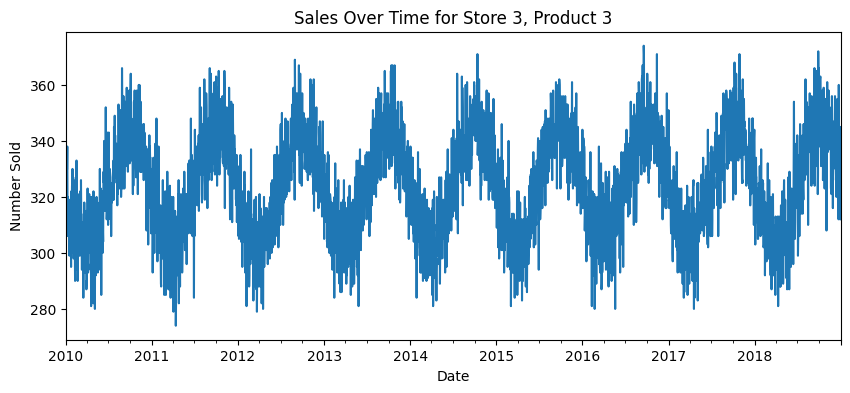

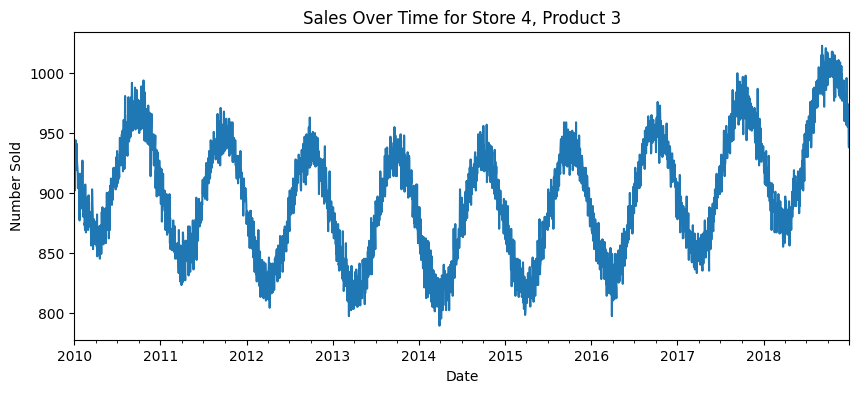

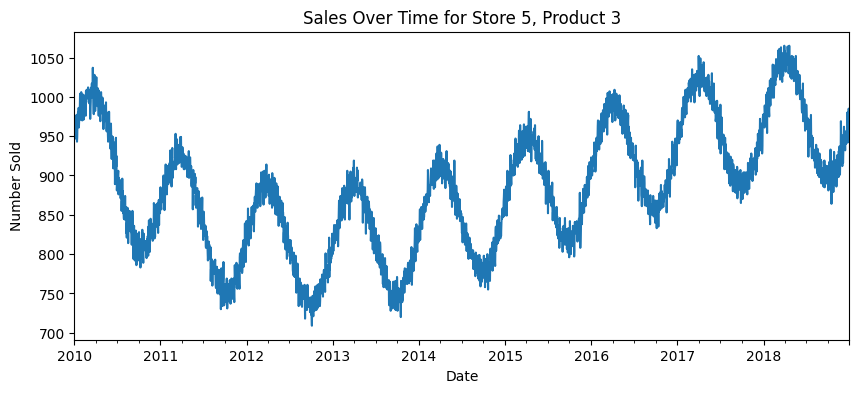

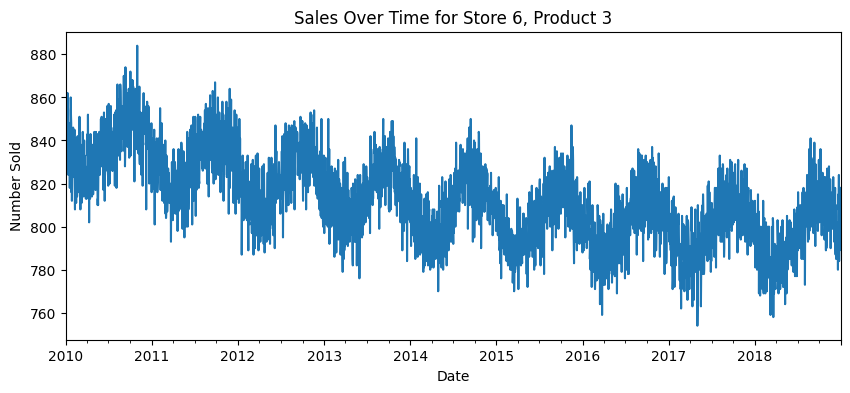

In [25]:
# Visualize a few diverse store-product combinations

for store_id in range(0, 7):  # Iterate over each store
    sample_data = dataset[(dataset['store'] == store_id) & (dataset['product'] == 3)] # Product 4 as example
    sample_data.set_index('Date', inplace=True)
    sample_data['number_sold'].plot(title=f"Sales Over Time for Store {store_id}, Product 3", figsize=(10, 4))
    plt.xlabel('Date')
    plt.ylabel('Number Sold')
    plt.show()


### Why Sample-Based Visualization Is Useful but Limited
1. **Preliminary Insight**: Sample-based visualization is valuable because it allows us to spot potential trends, seasonality, and volatility quickly.  
However, since each product can have its unique demand pattern, we can’t assume that one product’s patterns fully represent others, even within the same store.

2. **Unique Characteristics Across Products**: Different products often exhibit unique sales behaviors due to:

    1. Seasonal demand variations (e.g., seasonal items vs. staples),
    2. Product-specific promotions or discounts, and
    3. Varying product life cycles (new products vs. mature products).

For a robust forecasting model, we’ll want to treat each store-product combination as its own unique time series. This approach ensures we capture each combination’s specific patterns during model training.

**Aggregated Analysis by store**: Check if there’s a consistent seasonal pattern in total or average sales across all products for a store.    

To validate whether any broader trends apply across all products in a store (or stores for a product), we could look at aggregated metrics like the mean or median sales within each store or for each product:

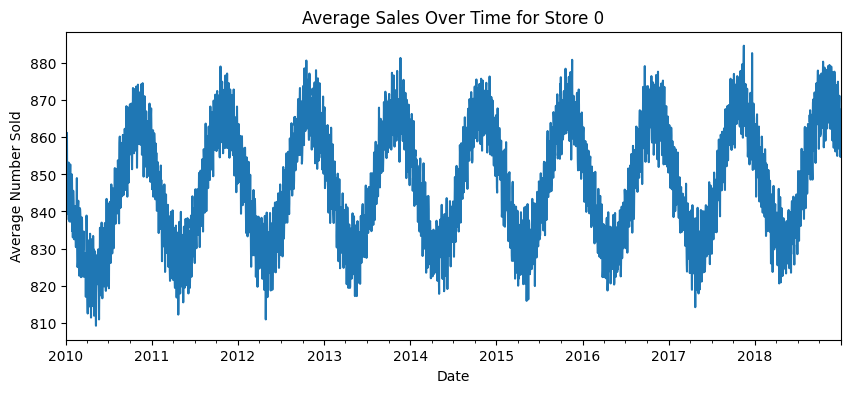

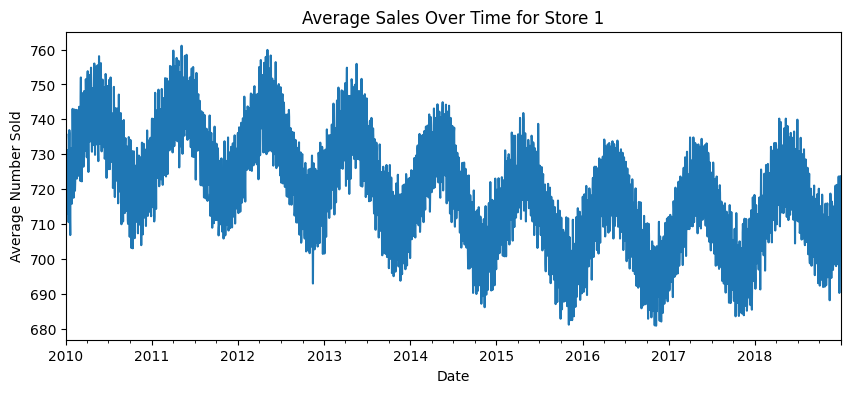

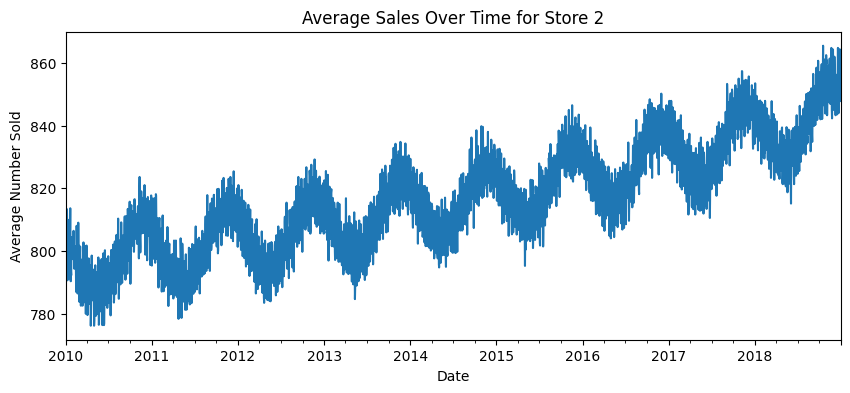

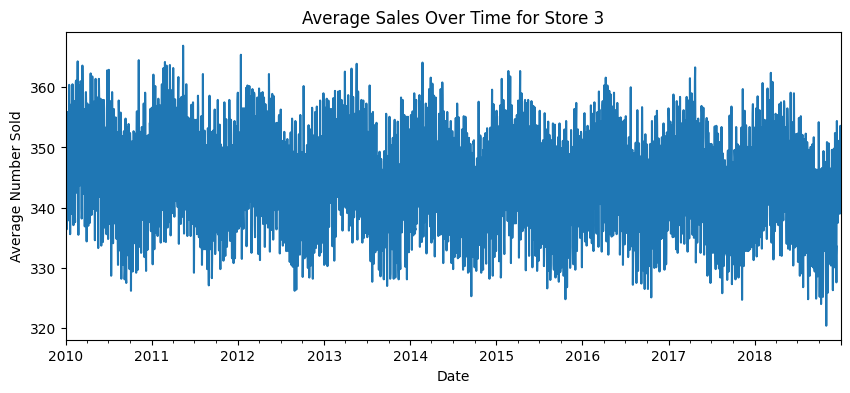

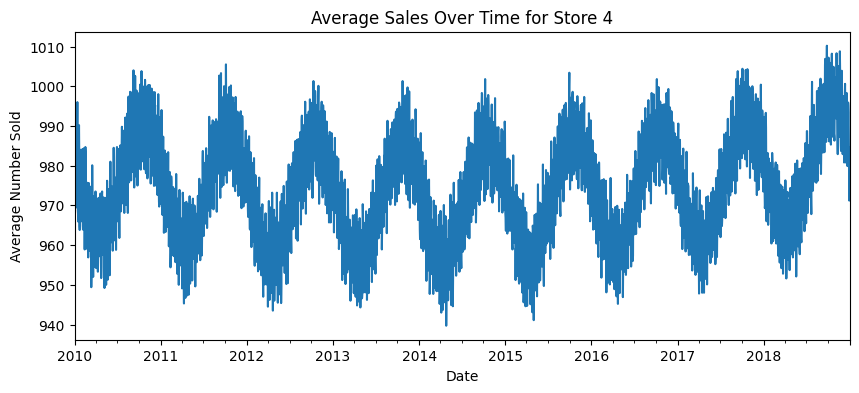

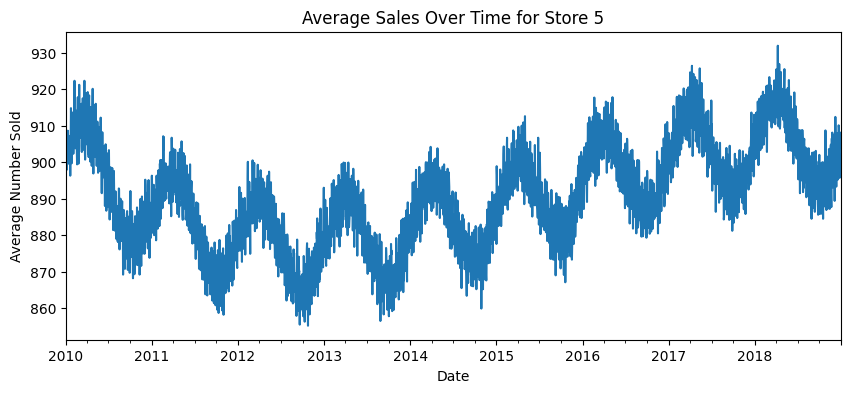

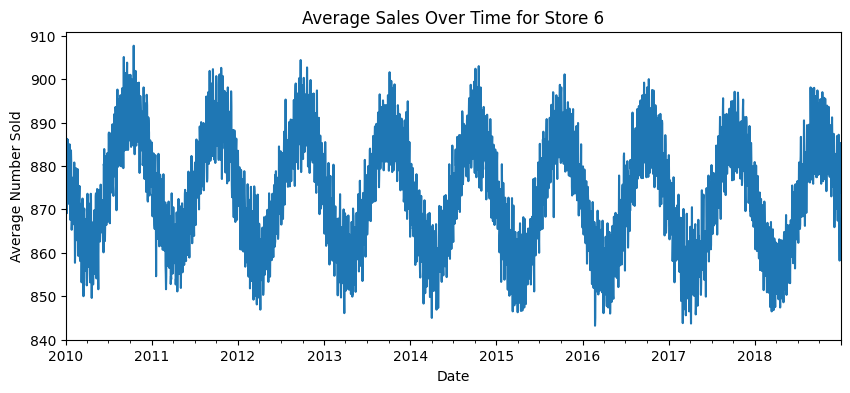

In [26]:
for store_id in range(7):
    store_data = dataset[dataset['store'] == store_id].groupby('Date')['number_sold'].mean()
    store_data.plot(title=f"Average Sales Over Time for Store {store_id}", figsize=(10, 4))
    plt.xlabel('Date')
    plt.ylabel('Average Number Sold')
    plt.show()

**Aggregated Analysis by product**: Check if there’s a consistent seasonal pattern in total or average sales across all stores for a product.    


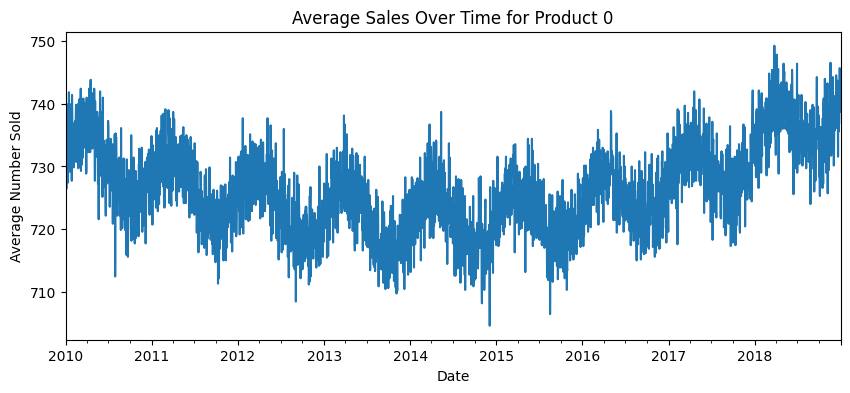

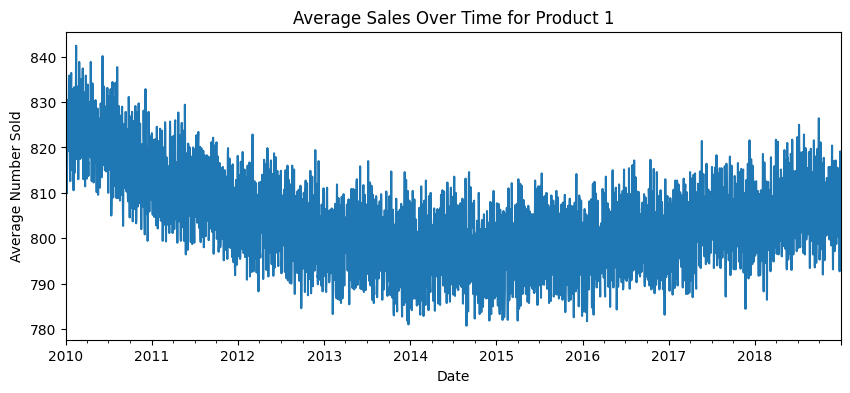

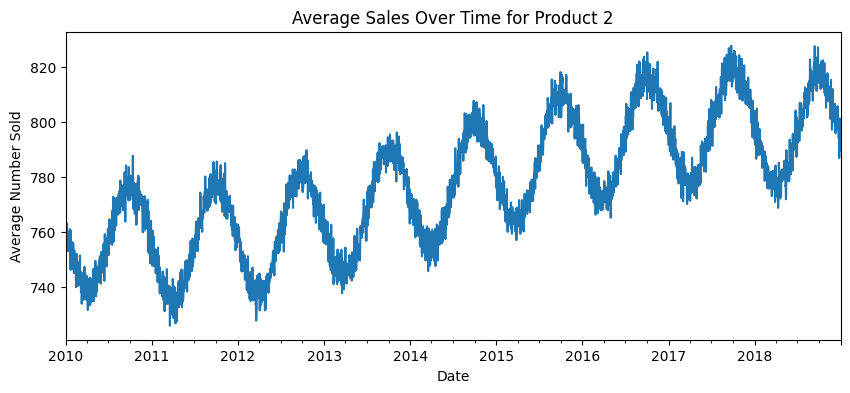

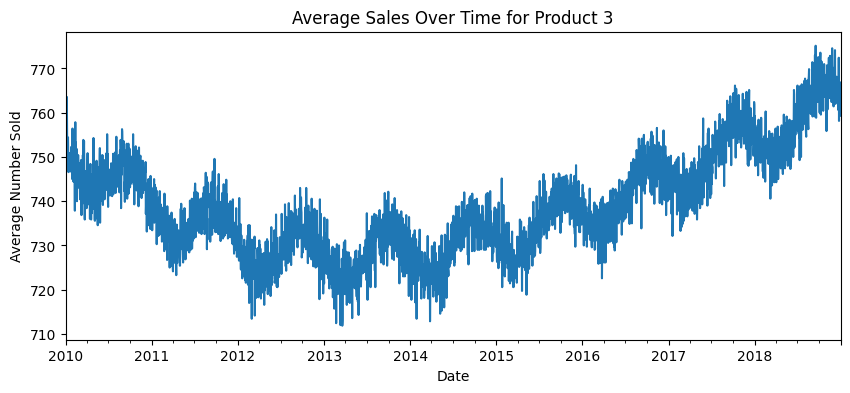

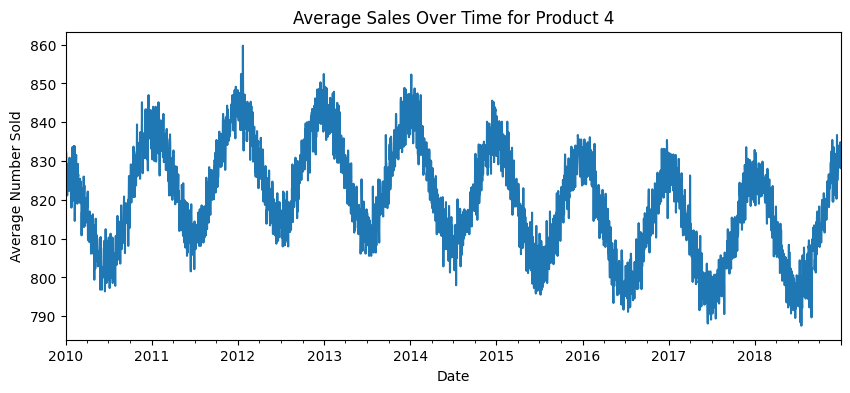

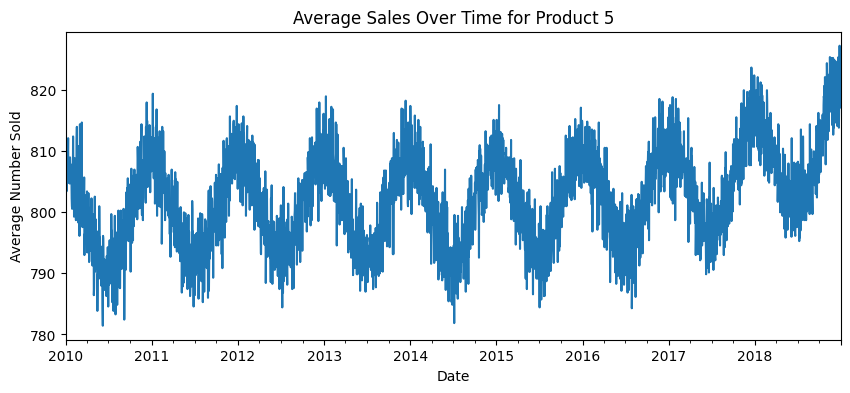

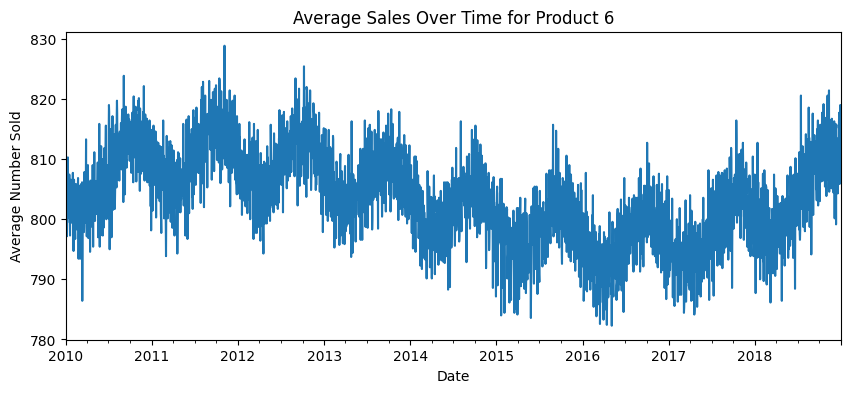

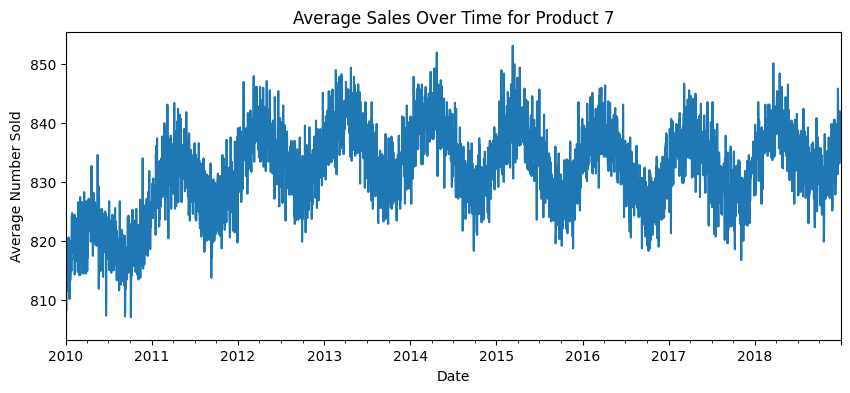

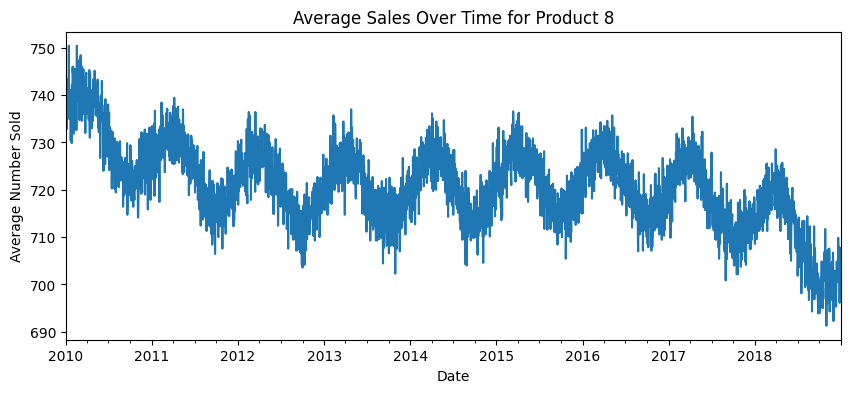

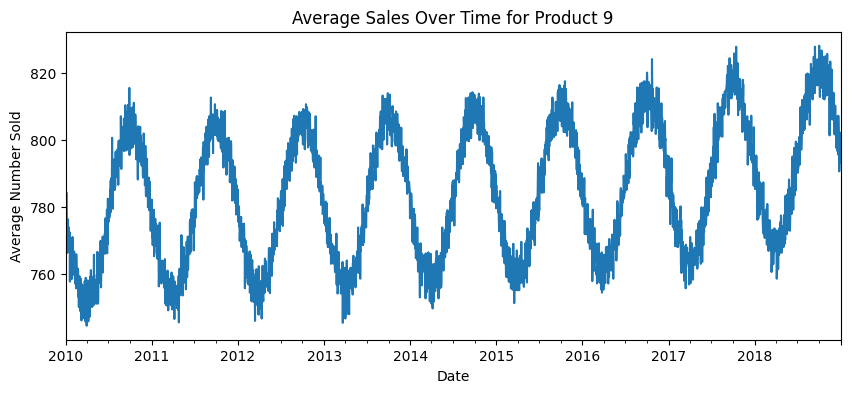

In [27]:
for product_id in range(10):
    product_data = dataset[dataset['product'] == product_id].groupby('Date')['number_sold'].mean()
    product_data.plot(title=f"Average Sales Over Time for Product {product_id}", figsize=(10, 4))
    plt.xlabel('Date')
    plt.ylabel('Average Number Sold')
    plt.show()